<a href="https://colab.research.google.com/github/vcautela/Regressao_Linear_MKT/blob/main/Regressao_Linear_MKT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

<h1>Análise descritiva dos dados</h1>


*   Importar o arquivo CSV
*   entender sobre o dataset e suas colunas para possível tratamento de dados (nulos, duplicados, e também tipo de dado (obj, int, float)





In [2]:
# importando o arquivo csv
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Desafio 4 DNC/MKT.csv", sep = ",")
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [4]:
df.duplicated().sum()

0

<h1>Análise exploratória dos dados</h1>


*   Análise descritiva para entender mais sobre o comportamento dos dados, a relação de média, quartis, e desvio padrão já nos traz algumas conclusões sobre o nosso dataset.
*   O Boxplot traz outra visualização para os quartis e também na identificação de possíveis outliers
*   correlação dos dados a partir de gráficos como pairplot, tabela de correlação com o comando .corr() e heatmap, trazendo a correlação a partir de outro tipo de visualização.
*   analisando a distribuição dos dados com .histplot() e densidade a partir do gráfico de dispersão .regplot()






In [5]:
round(df.describe(), 2)

,youtube,facebook,newspaper,sales
count,171.00,171.00,171.00,171.00
mean,178.02,27.67,35.24,16.92
std,102.45,17.91,24.90,6.31
min,0.84,0.00,0.36,1.92
25%,91.08,11.70,13.74,12.54
50%,179.76,26.76,31.08,15.48
75%,262.98,43.68,50.88,20.82
max,355.68,59.52,121.08,32.40


<Axes: xlabel='sales'>

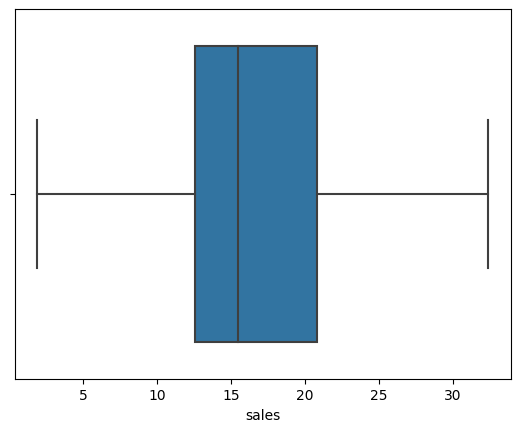

In [6]:
sns.boxplot(data=df,x="sales")

<Axes: xlabel='youtube'>

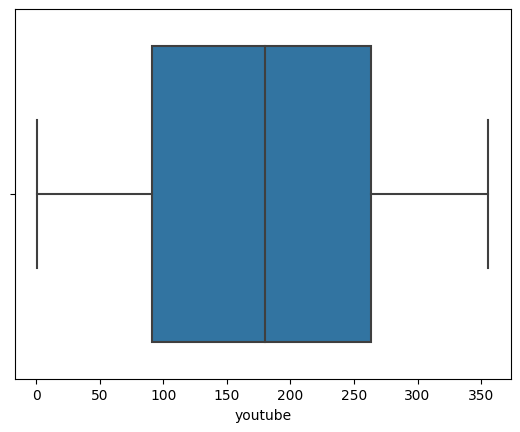

In [7]:
sns.boxplot(data=df,x="youtube")

<Axes: xlabel='facebook'>

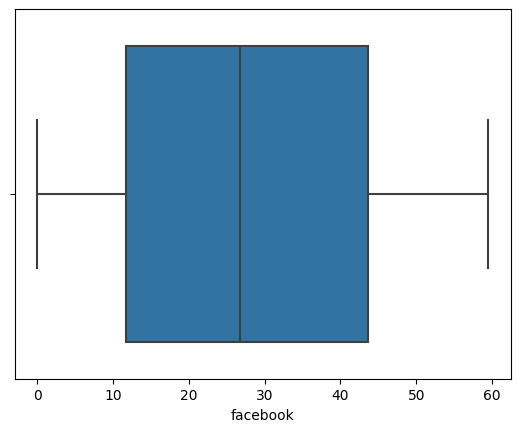

In [8]:
sns.boxplot(data=df,x="facebook")

<Axes: xlabel='newspaper'>

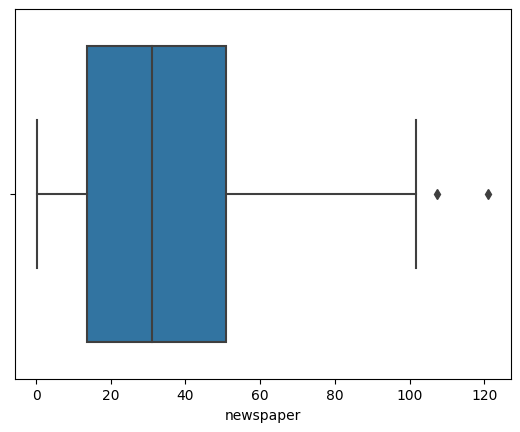

In [9]:
sns.boxplot(data=df,x="newspaper")

In [10]:
# identificando outliers em newspaper
outliers = df.query("newspaper > 100")
outliers


,youtube,facebook,newspaper,sales
46,20.28,52.44,107.28,10.44
72,355.68,43.56,121.08,28.56
136,281.40,4.08,101.76,14.28


In [11]:
df.loc[df["newspaper"] > 100, 'newspaper']

46     107.28
72     121.08
136    101.76
Name: newspaper, dtype: float64

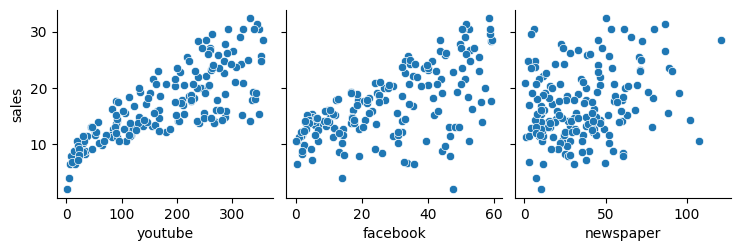

In [12]:
sns.pairplot(df, x_vars=["youtube", "facebook", "newspaper"], y_vars="sales")

In [13]:
df_corr = df.corr()
df_corr

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


<Axes: >

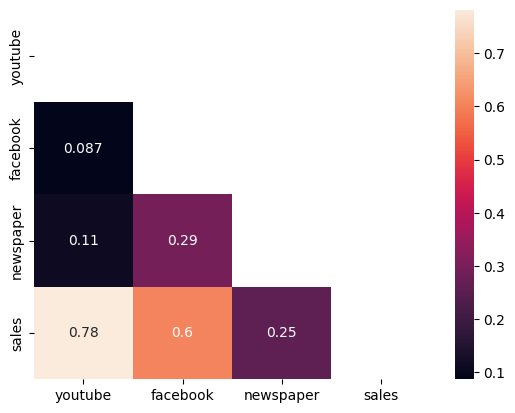

In [14]:
mask = np.triu(np.ones_like(df_corr))
sns.heatmap(df.corr(), annot=True, mask=mask)

<Axes: xlabel='sales', ylabel='Density'>

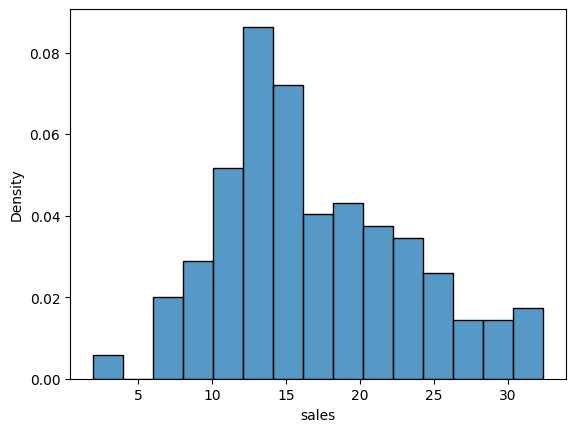

In [15]:
#  gráficos de distribuição
sns.histplot(x=df["sales"], bins=15, stat="density")

[Text(0.5, 1.0, 'Newspaper')]

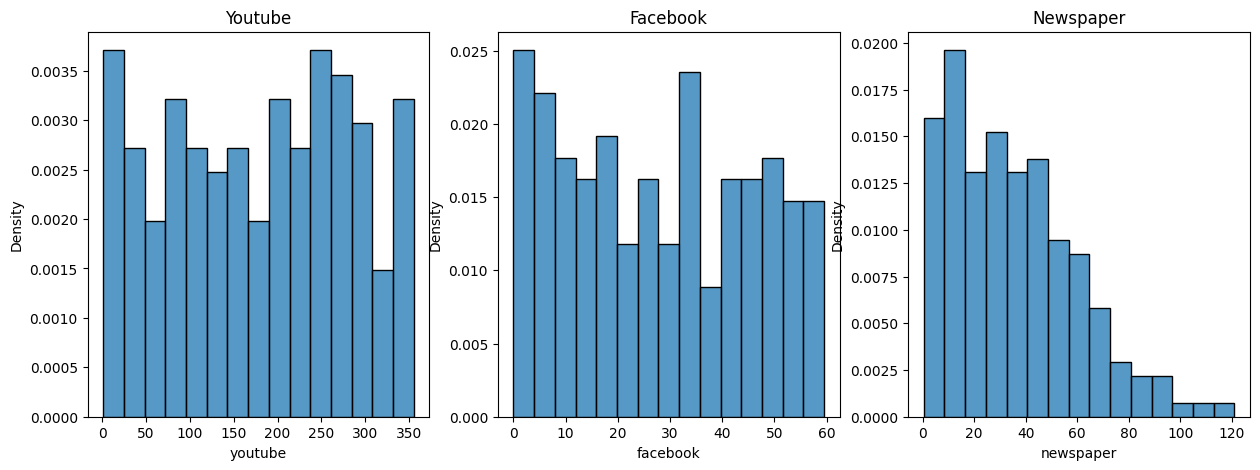

In [16]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.histplot(data=df["youtube"], ax=axes[0], bins=15, stat="density").set(title="Youtube")
sns.histplot(data=df["facebook"], ax=axes[1], bins=15, stat="density").set(title="Facebook")
sns.histplot(data=df["newspaper"], ax=axes[2], bins=15, stat="density").set(title="Newspaper")

<Axes: xlabel='newspaper', ylabel='sales'>

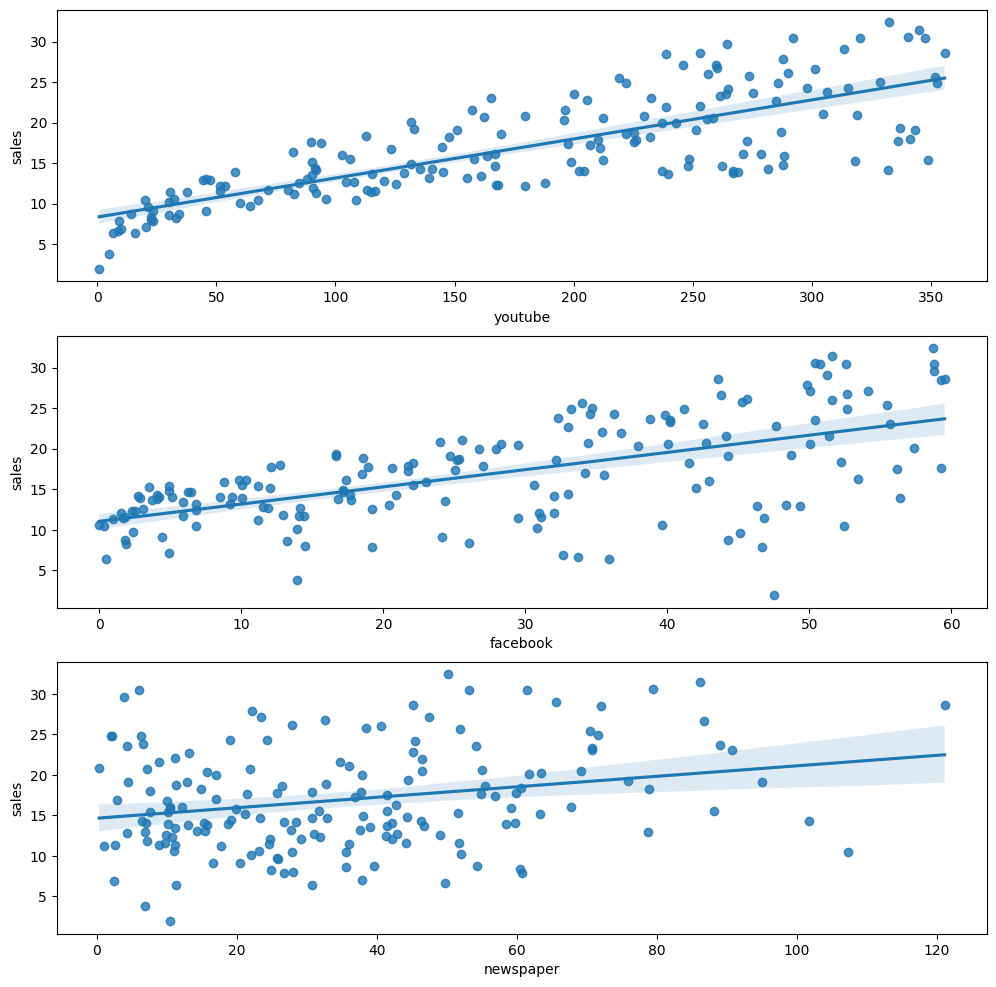

In [17]:
# dispersão dos dados

fig, axes = plt.subplots(3,1, figsize=(12,12))

sns.regplot(data=df, x=df["youtube"], y=df["sales"],fit_reg=True, ax=axes[0])
sns.regplot(data=df, x=df["facebook"], y=df["sales"],fit_reg=True, ax=axes[1])
sns.regplot(data=df, x=df["newspaper"], y=df["sales"],fit_reg=True, ax=axes[2])

<h1>Modelagem dos dados</h1>



In [18]:
x = df.drop(columns=["sales"])
y = df["sales"].to_frame(name="sales")

In [19]:
display(x, y)

,youtube,facebook,newspaper
0,84.72,19.20,48.96
1,351.48,33.96,51.84
2,135.48,20.88,46.32
3,116.64,1.80,36.00
4,318.72,24.00,0.36
...,...,...,...
166,45.84,4.44,16.56
167,113.04,5.88,9.72
168,212.40,11.16,7.68
169,340.32,50.40,79.44


,sales
0,12.60
1,25.68
2,14.28
3,11.52
4,20.88
...,...
166,9.12
167,11.64
168,15.36
169,30.60


In [20]:
#train_size -> 70% para base de treino, 30% para teste;
#random_state -> embaralha os dados
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3,random_state = 42)

In [21]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(119, 3)
(52, 3)
(119, 1)
(52, 1)


In [22]:
lr = LinearRegression()

In [23]:
#treinando o modelo
lr.fit(x_train, y_train)

LinearRegression()

In [24]:
#predição do treino
y_pred = lr.predict(x_test)

In [25]:
# r2 score: quanto maior, maior é a possibilidade de acerto. Comparando y_test com ypred (resultado real com predição)
r = r2_score(y_test, y_pred)
print("r2_score:", r)

r2_score: 0.882423505618885


Text(0, 0.5, 'sales')

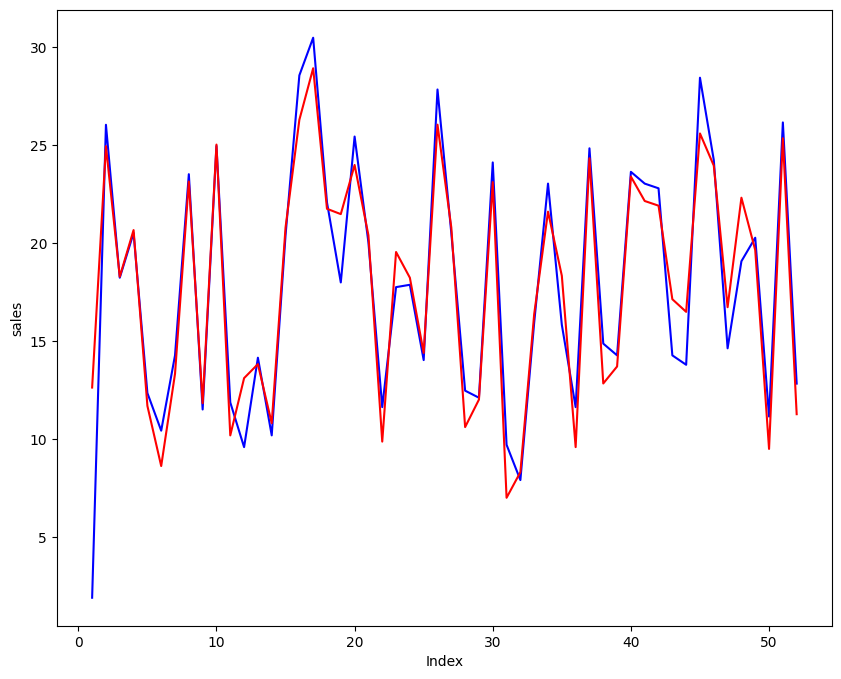

In [26]:
# comando "for" está ordenando o INDEX, que foi embaralhado ao treinar o modelo
c = [i for i in range (1, 53, 1)]
fig = plt.figure(figsize=(10, 8))
plt.plot(c, y_test, color="blue")
plt.plot(c, y_pred, color="red")
plt.xlabel("Index")
plt.ylabel("sales")

<Axes: >

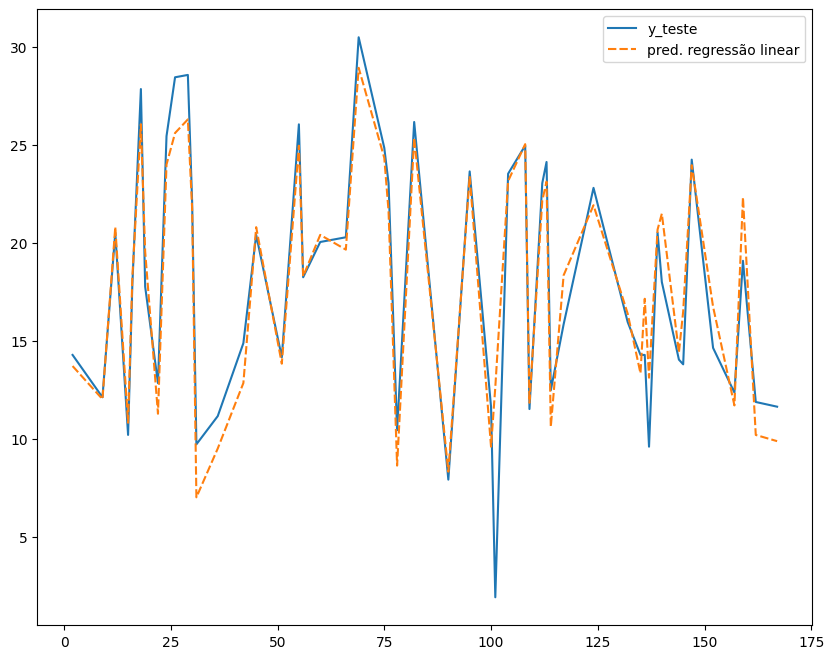

In [29]:
# gráfico mais correto, com o index embaralhado.
tabela = pd.DataFrame()
fig = plt.figure(figsize=(10, 8))
tabela["y_teste"] = y_test
tabela["pred. regressão linear"] = y_pred
sns.lineplot(data=tabela)

In [28]:
y_test

,sales
101,1.92
55,26.04
56,18.24
139,20.52
157,12.36
78,10.44
135,14.28
104,23.52
109,11.52
108,24.96
